In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Printing the files inside the dataset
print(os.listdir("../dataset"))

['.DS_Store', 'spam.csv']


In [3]:
# Load data in dataframe
df = pd.read_csv("../dataset/spam.csv", encoding="latin-1")
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.rename(columns={"v1": "label", "v2": "message"}, inplace=True)
df.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Text(0.5, 1.0, 'Number of spam or ham messages')

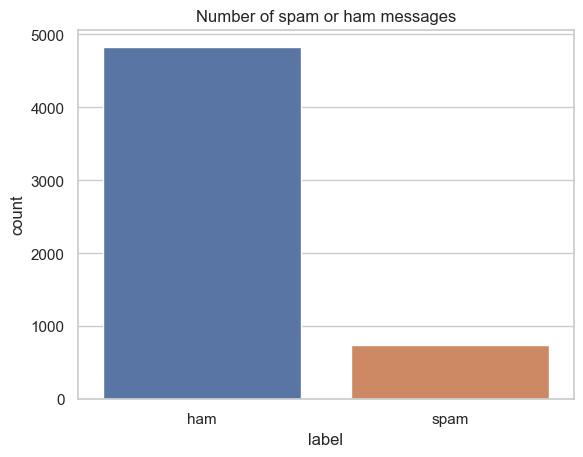

In [7]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df.label)
plt.xlabel("label")
plt.title("Number of spam or ham messages")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

y = df["label"]
x = df["message"]
coun_vectorizer = CountVectorizer()
x = coun_vectorizer.fit_transform(x)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42
)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Naive Bayes Classifier - multinomial NB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)
y_prediction = classifier.predict(x_test)

In [11]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1202
        spam       0.91      0.92      0.91       191

    accuracy                           0.98      1393
   macro avg       0.95      0.95      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [12]:
import joblib

joblib.dump(classifier, "../models/NB_Spam_Model.pkl")

['../models/NB_Spam_Model.pkl']